In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway
from scipy.special import stdtr
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from preprocess import impute_multi_2
from scipy.stats import boxcox

In [2]:
##load train data
raw_train = pd.read_csv('train.csv')
df=raw_train.copy()

In [3]:
from math import log
df['SalePrice']=[log(x) for x in df.SalePrice]

In [4]:
#This funtion plot the relationshipn between y and other variables. Float, int, or str use different types of plots
def plot_saleprice_vars(df,range_index, y_min, y_max):
    plt.close('all')
    try:
        for i in range_index:
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                plt.figure(i+1)
                data.plot.scatter(x=df.columns[i], y="SalePrice", ylim=(y_min,y_max))
                plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    data.plot.scatter(x=df.columns[i], y="SalePrice", ylim=(y_min,y_max))
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
                else:
                    data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    sns.boxplot(x=df.columns[i], y='SalePrice', data=data)
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
        plt.show()
    except:
        print("Error: index out of range")

In [5]:
# corrmap = df.corr()
# f, ax = plt.subplots(figsize=(16,12))
# sns.heatmap(corrmap, vmax=0.8, square=True)

In [6]:
##from the bottom line in this heatmap. 'OverallQual','GrLiveArea', 'GarageArea', 

In [7]:
pd.set_option('display.max_rows', 100)

In [8]:
def plot_LotFrontage_vars(df,range_index):
    plt.close('all')
    try:
        for i in range_index:
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                plt.figure(i+1)
                data.plot.scatter(x=df.columns[i], y="LotFrontage", ylim=(0,200))
                plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    data.plot.scatter(x=df.columns[i], y="LotFrontage", ylim=(0,200))
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
                else:
                    data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    sns.boxplot(x=df.columns[i], y='LotFrontage', data=data)
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
        plt.show()
    except:
        print("Error: index out of range")

In [9]:
# df.loc[df.LotFrontage.isnull()].hist(bins=50, figsize=(30,40))
# plt.show()

In [10]:
###This function could also be imported from preprocess module
def summ(df):
    temp = pd.DataFrame(df.columns, columns=['name'])
    temp['type'] = [type(df[col][df[col].first_valid_index()]) for col in df.columns]
    temp['num_not_NAs'] = [df[col].dropna().shape[0] for col in df.columns]
    temp['num_dupl'] = [df[col].dropna().nunique() for col in df.columns]
    temp['ratio_NAs'] = [(1460-x)/1460 for x in temp['num_not_NAs']]
    return temp

In [11]:
#This function could also be imported from preprocess module
def plot_individual_columns(df,range_col):
    try:
        for i in range_col:
            serie = df.iloc[:,i]
            ##There are three classes for all the columns: float, integer, and str
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                plt.figure(i)
                sns.distplot(df.iloc[:,i].dropna(), label=('%s' %(df.columns[i])))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    plt.figure(i)
                    plt.hist(df.iloc[:,i])
                    plt.xlabel('%s' %(df.columns[i]))
                else:
                    ##The category columns are not plotted. 
                    pass
            plt.show()
    except IndexError:
        print("Error: The index selected is out of the range")

In [ ]:
##Year_built feature showed linearity with price after 1945. thus could set before 1945 as 0, 1946 as 1, 1947 as 2
## and so on
plt.figure(1)
plt.scatter(df.groupby('YearBuilt').SalePrice.mean().index,df.groupby('YearBuilt').SalePrice.mean().values)
plt.xlabel('year built')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YearBuilt').count()['Id'].index, df.groupby('YearBuilt').count()['Id'].values)
plt.xlabel('year built')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YearBuilt, df.SalePrice)
plt.xlabel('year built')
plt.ylabel('Price')
plt.show()

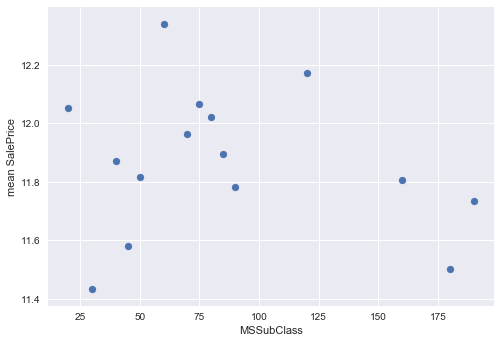

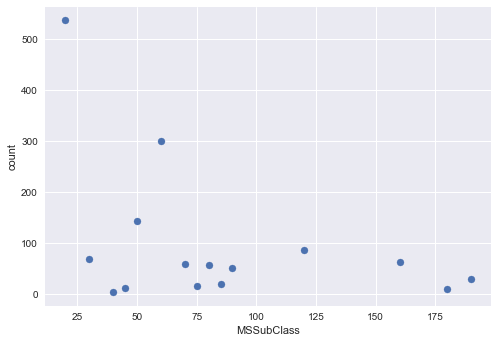

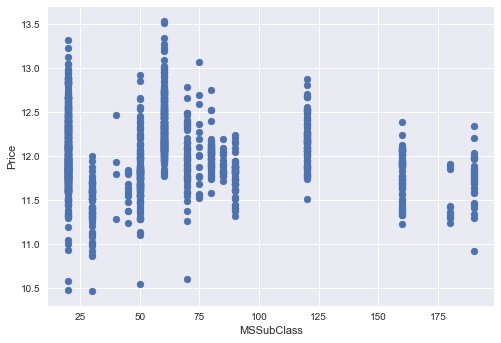

In [16]:
###MSSubClass Important feature, contain too much information, Share info with HouseType, Year_built
#Type of Int64 make no sense. Should change to category
#Should split into different features and combine with others
plt.figure(1)
plt.scatter(df.groupby('MSSubClass').SalePrice.mean().index,df.groupby('MSSubClass').SalePrice.mean().values)
plt.xlabel('MSSubClass')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('MSSubClass').count()['Id'].index, df.groupby('MSSubClass').count()['Id'].values)
plt.xlabel('MSSubClass')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.MSSubClass, df.SalePrice)
plt.xlabel('MSSubClass')
plt.ylabel('Price')
plt.show()

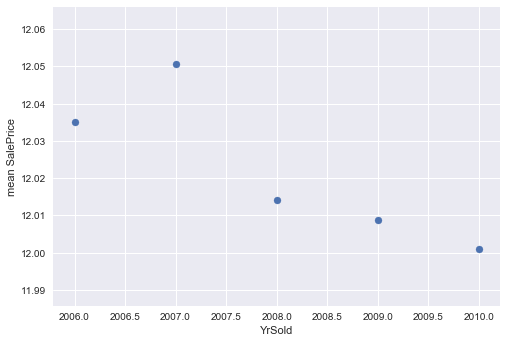

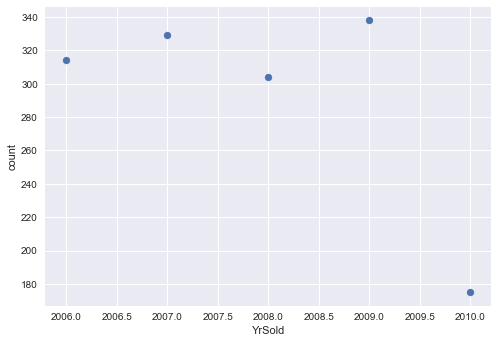

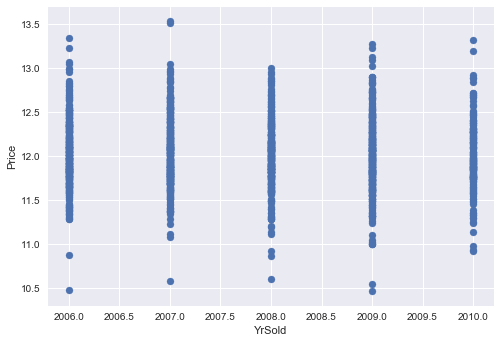

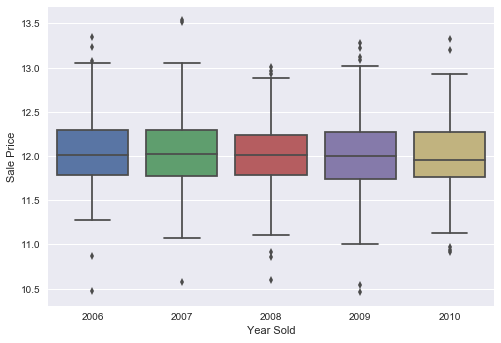

ANOVA test: p-value is 0.565637


In [20]:
##YearSold, plots and ANOVA test. plot showed slightly difference
#but ANOVA Testshowed no significant difference, thus drop Year_Sold
plt.figure(1)
plt.scatter(df.groupby('YrSold').SalePrice.mean().index,df.groupby('YrSold').SalePrice.mean().values)
plt.xlabel('YrSold')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YrSold').count()['Id'].index, df.groupby('YrSold').count()['Id'].values)
plt.xlabel('YrSold')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YrSold, df.SalePrice)
plt.xlabel('YrSold')
plt.ylabel('Price')
plt.figure(4)
sns.boxplot(x='YrSold', y='SalePrice',data=df )
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()
#ANOVA test showed no significant difference, thus drop Year_Sold
f_2006 = df.loc[df['YrSold']==2006,:].SalePrice
f_2007 = df.loc[df['YrSold']==2007,:].SalePrice
f_2008 = df.loc[df['YrSold']==2008,:].SalePrice
f_2009 = df.loc[df['YrSold']==2009,:].SalePrice
f_2010 = df.loc[df['YrSold']==2010,:].SalePrice
f_, p_ = f_oneway(f_2006, f_2007, f_2008, f_2009, f_2010)
print('ANOVA test: p-value is %f' %p_)

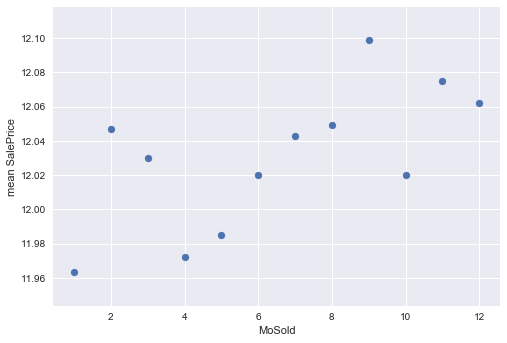

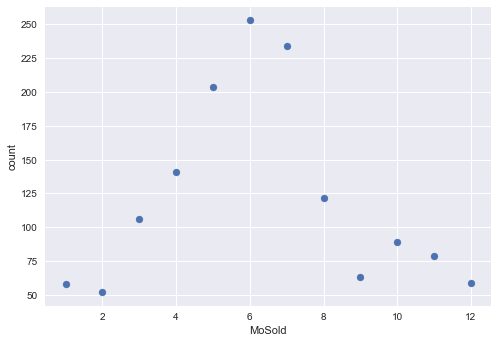

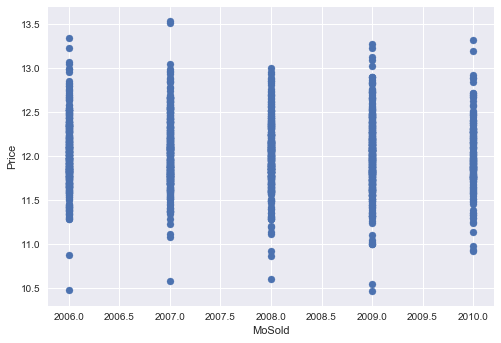

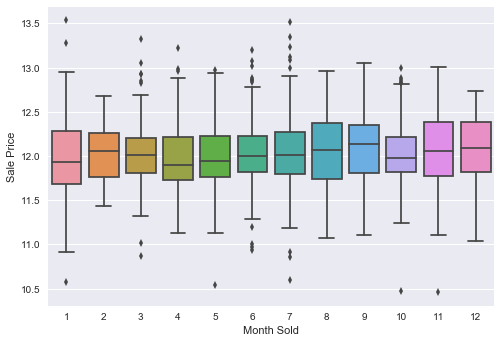

0.44966156911


In [24]:
##YearSold, plots and ANOVA test. plot showed slightly difference
#but ANOVA Testshowed no significant difference, thus drop Year_Sold
plt.figure(1)
plt.scatter(df.groupby('MoSold').SalePrice.mean().index,df.groupby('MoSold').SalePrice.mean().values)
plt.xlabel('MoSold')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('MoSold').count()['Id'].index, df.groupby('MoSold').count()['Id'].values)
plt.xlabel('MoSold')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YrSold, df.SalePrice)
plt.xlabel('MoSold')
plt.ylabel('Price')
plt.figure(4)
sns.boxplot(x='MoSold', y='SalePrice',data=df )
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.show()

##The ANOVA test of Month Sold showed p-value of 0.48. Thus, this column could be dropped
i=1
m_1=df.loc[df['MoSold'] == i,].SalePrice
m_2=df.loc[df['MoSold'] == (i+1),].SalePrice
m_3=df.loc[df['MoSold'] == (i+2),].SalePrice
m_4=df.loc[df['MoSold'] == (i+3),].SalePrice
m_5=df.loc[df['MoSold'] == (i+4),].SalePrice
m_6=df.loc[df['MoSold'] == (i+5),].SalePrice
m_7=df.loc[df['MoSold'] == (i+6),].SalePrice
m_8=df.loc[df['MoSold'] == (i+7),].SalePrice
m_9=df.loc[df['MoSold'] == (i+8),].SalePrice
m_10=df.loc[df['MoSold'] == (i+9),].SalePrice
m_11=df.loc[df['MoSold'] == (i+10),].SalePrice
m_12=df.loc[df['MoSold'] == (i+11),].SalePrice
f_, p_ = f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)
print(p_)

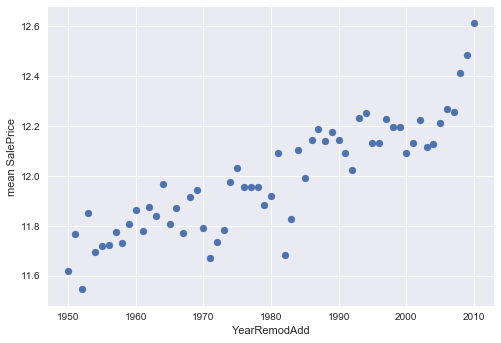

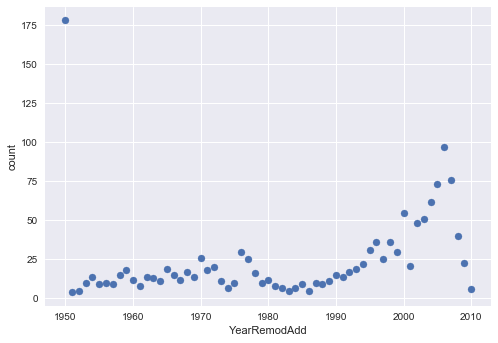

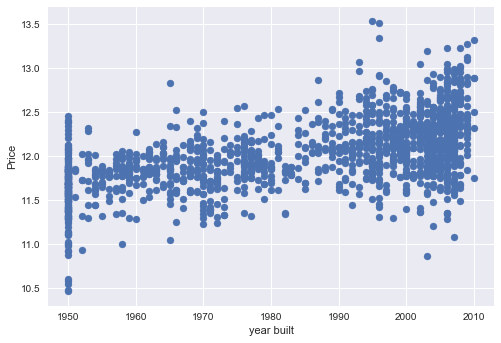

In [21]:
#YearRemodAdd Analysis
#substract YearRemodAdd by 1950 since all the value is larger or equal 1950. and drop YearBuilt,
#since if no RemodAdd, it is same with the YearBuilt
plt.figure(1)
plt.scatter(df.groupby('YearRemodAdd').SalePrice.mean().index,df.groupby('YearRemodAdd').SalePrice.mean().values)
plt.xlabel('YearRemodAdd')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YearRemodAdd').count()['Id'].index, df.groupby('YearRemodAdd').count()['Id'].values)
plt.xlabel('YearRemodAdd')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YearRemodAdd, df.SalePrice)
plt.xlabel('year built')
plt.ylabel('Price')
plt.show()

In [22]:
##LotShape, p-value is small.
t_1=df[df['LotShape'].str.contains('Reg')].SalePrice
t_2=df[df['LotShape'].str.contains('IR1')].SalePrice
t_3=df[df['LotShape'].str.contains('IR2')].SalePrice
t_4=df[df['LotShape'].str.contains('IR3')].SalePrice
f_, p_ = f_oneway(t_1,t_2,t_3,t_4)
p_

7.8569683278096161e-29

In [ ]:
sns.boxplot(x=df.Cond, y='LotFrontage', data=data)

In [85]:
#Condition2 Analysis



In [75]:
def anova_test(col_name):
    print(df.groupby(col_name).count()['Id'])

In [80]:
anova_test('LandContour')

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: Id, dtype: int64


In [79]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.iloc[df['3Sn']]

In [81]:
#plot_saleprice_vars(df, range(81), 10, log(800000))

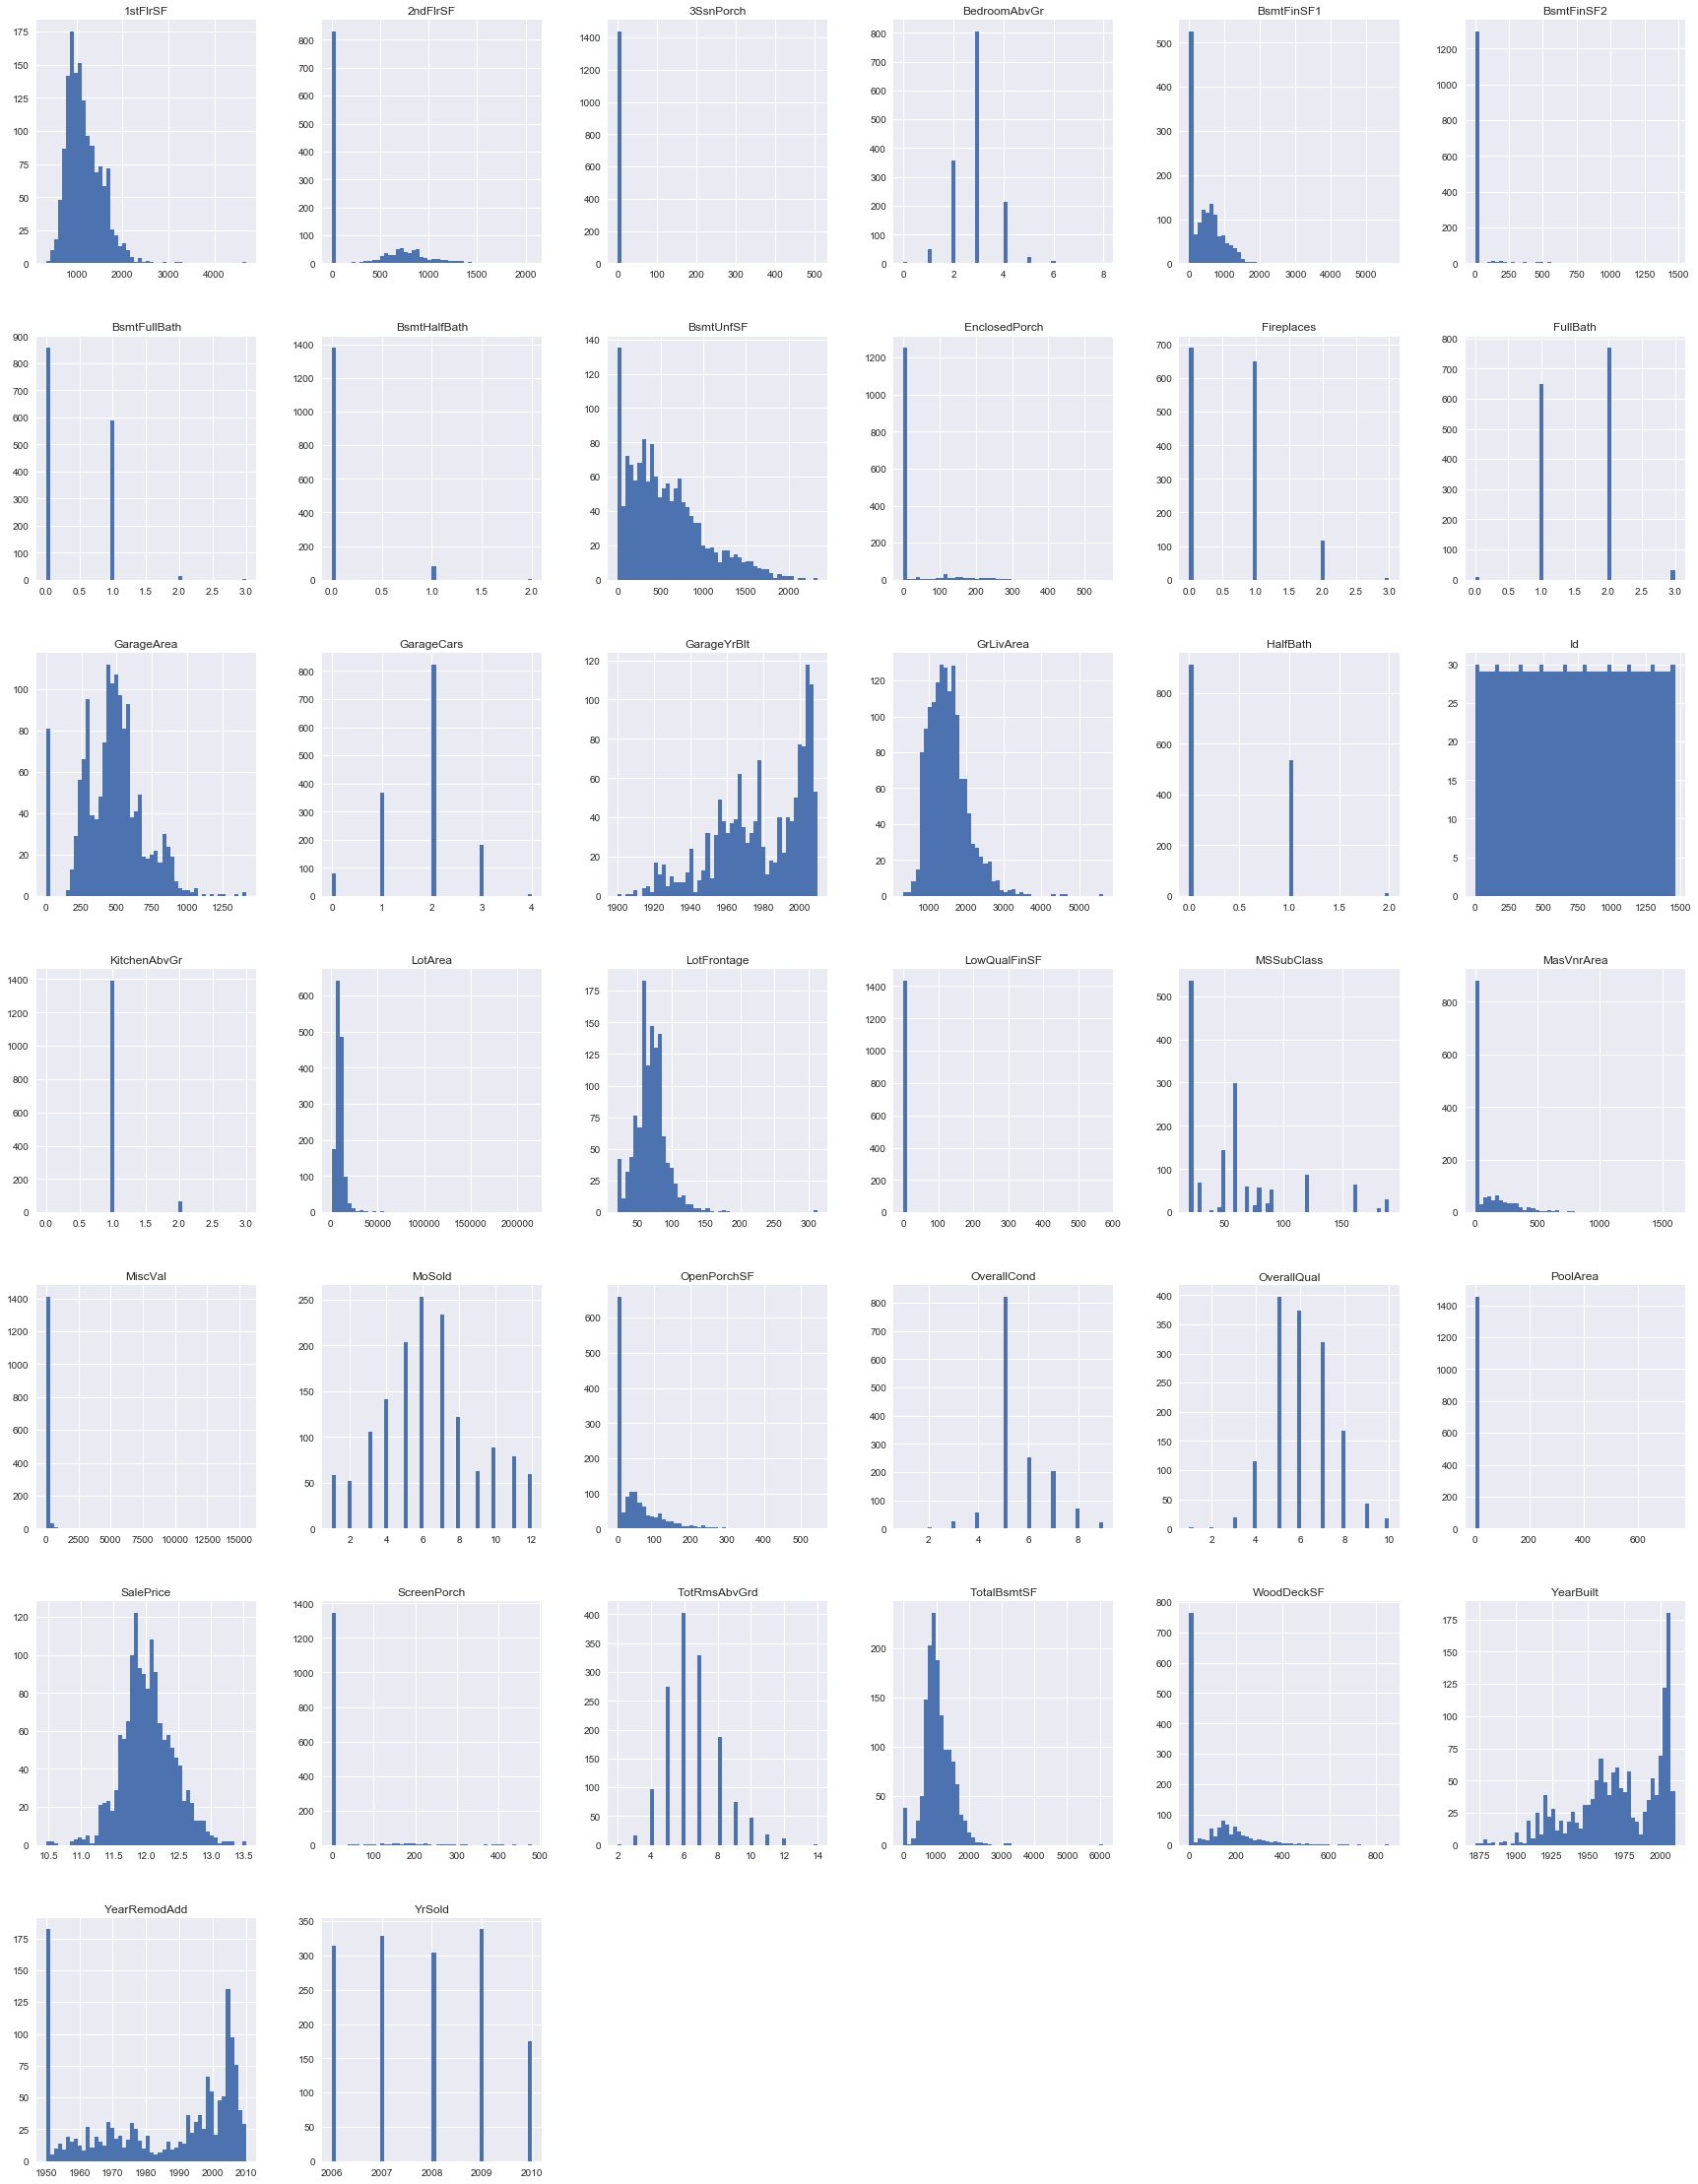

In [13]:
df.hist(bins=50, figsize=(30,40))
plt.show()

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


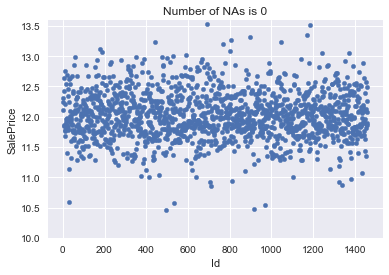

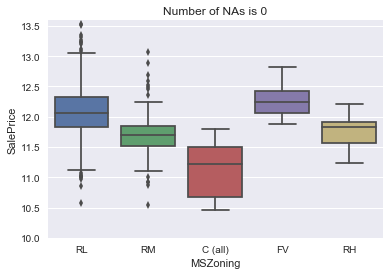

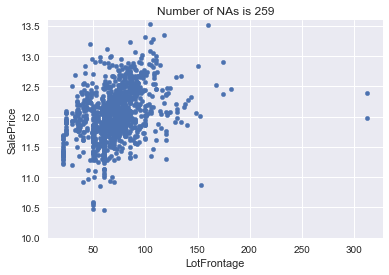

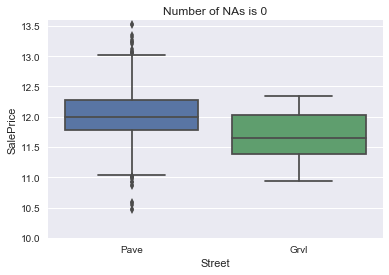

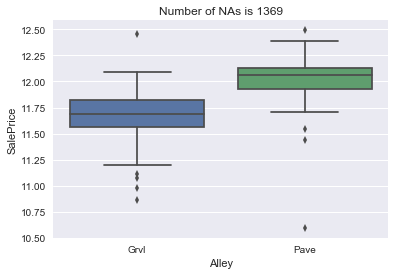

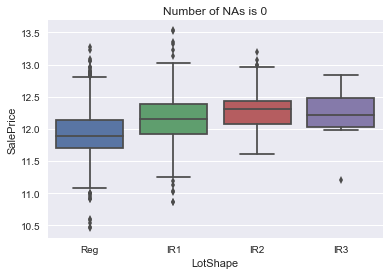

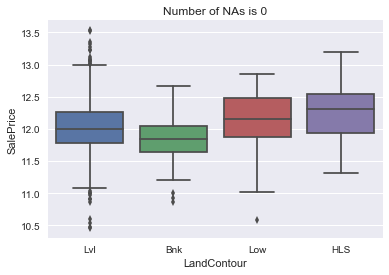

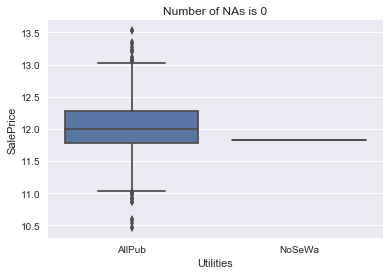

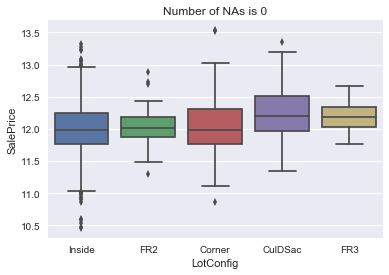

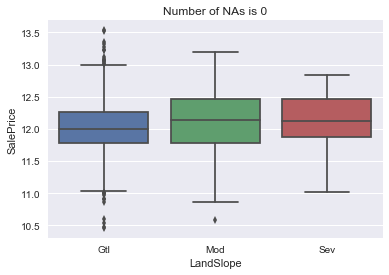

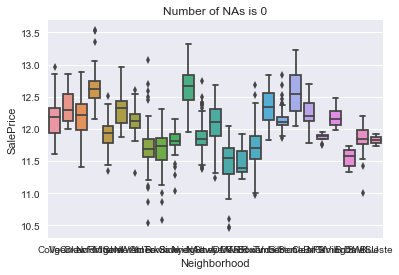

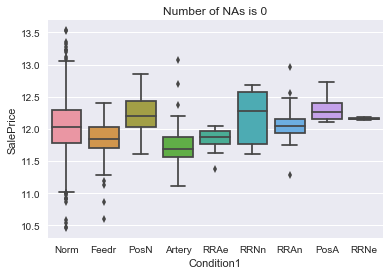

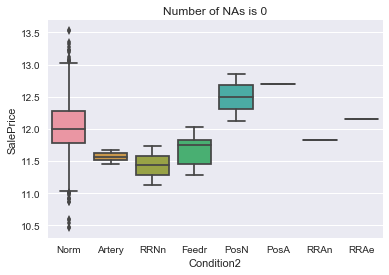

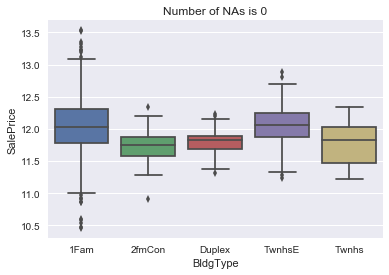

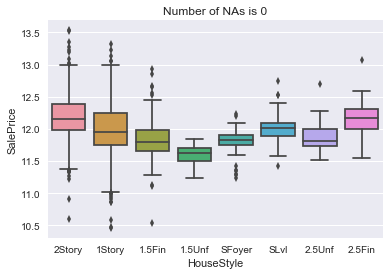

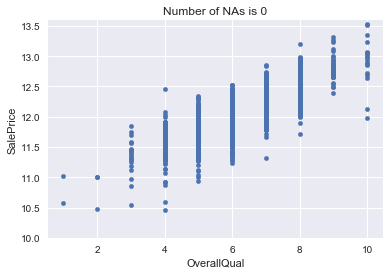

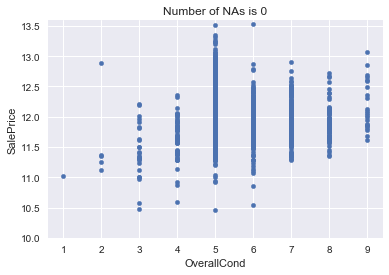

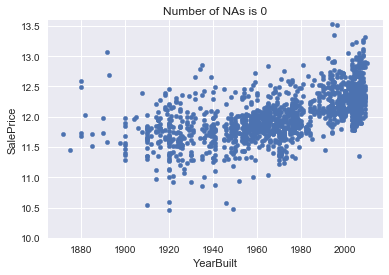

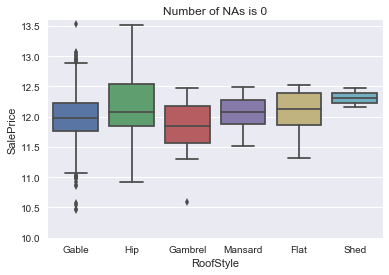

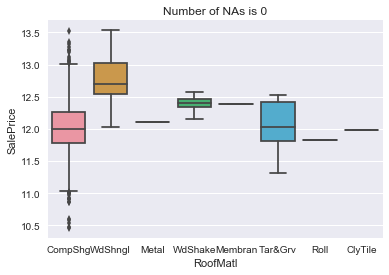

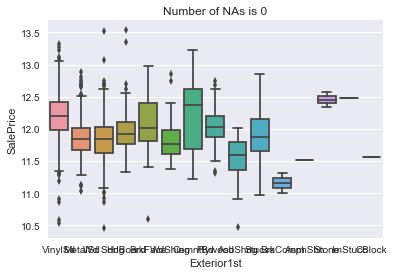

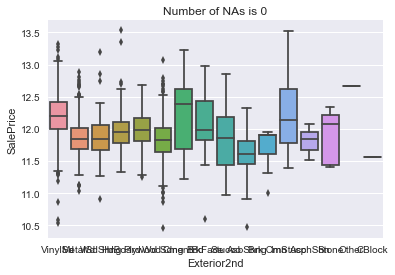

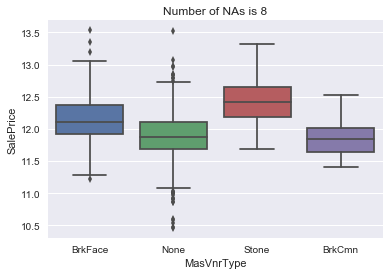

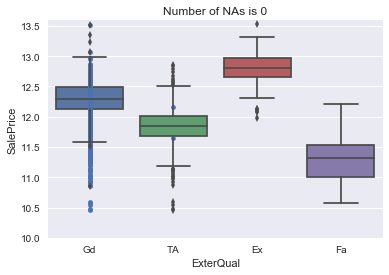

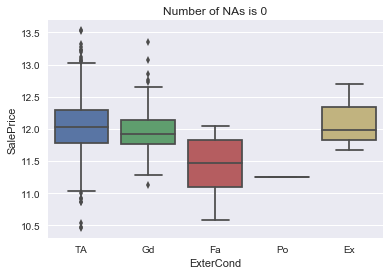

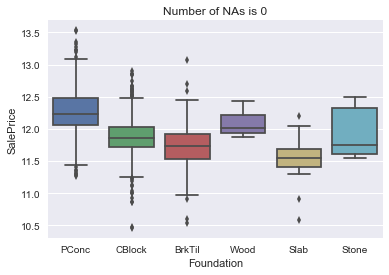

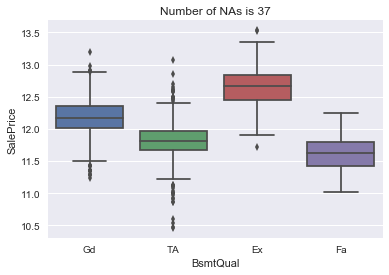

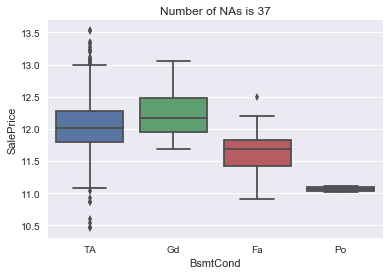

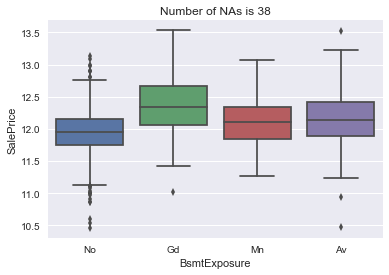

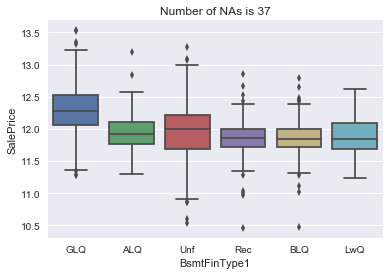

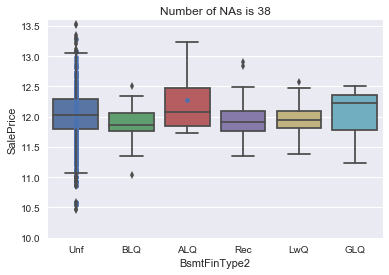

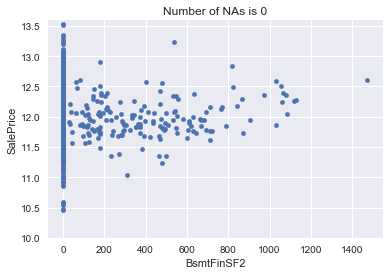

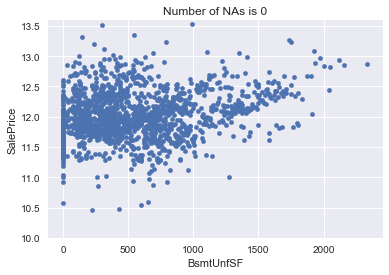

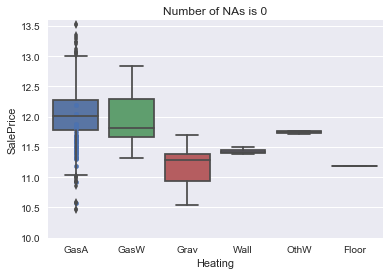

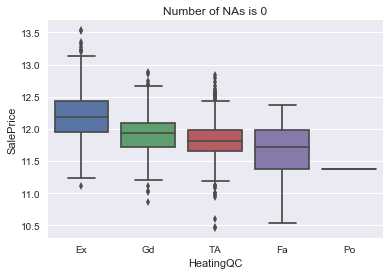

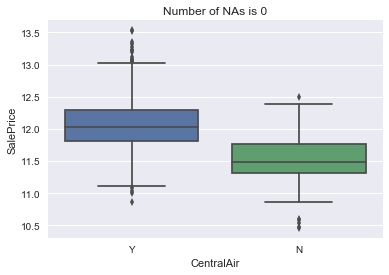

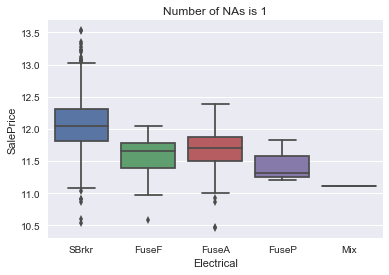

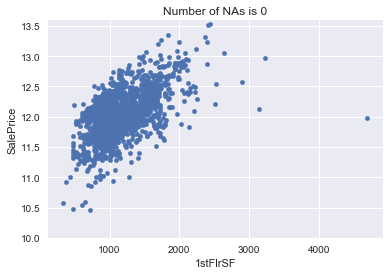

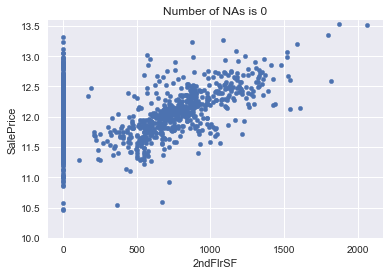

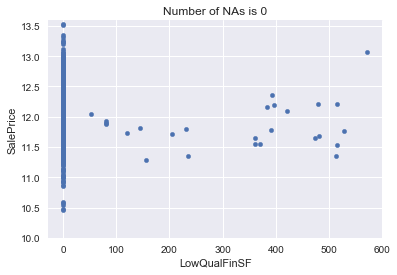

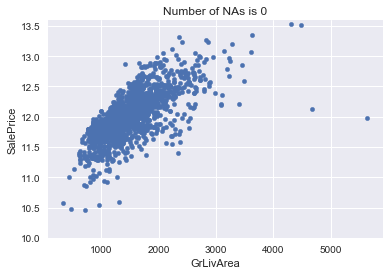

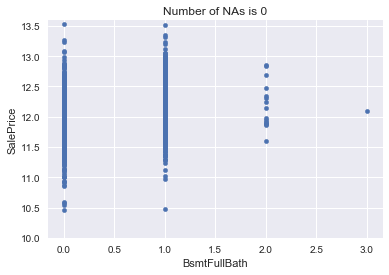

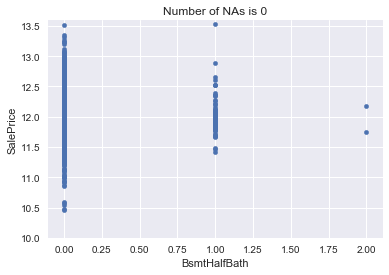

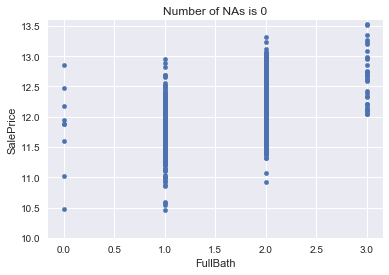

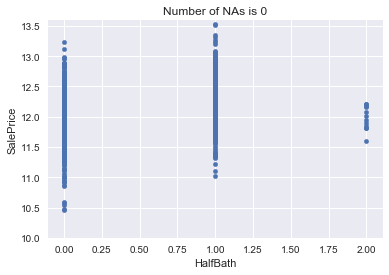

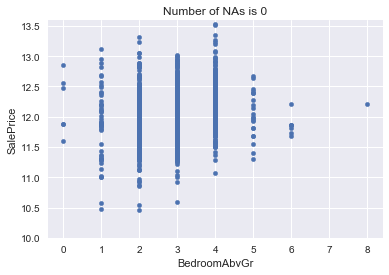

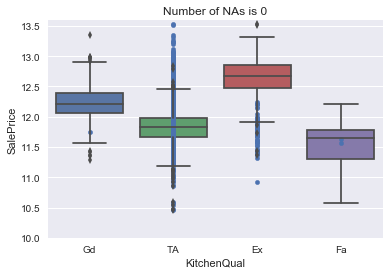

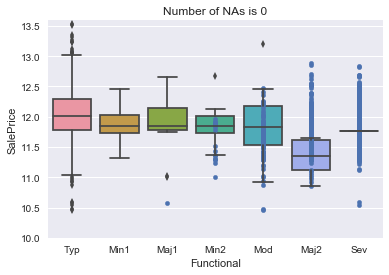

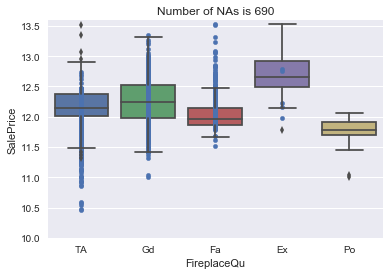

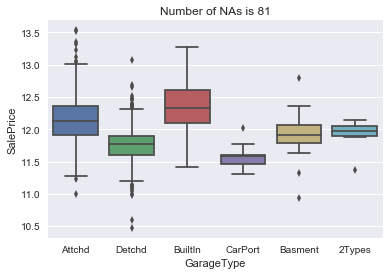

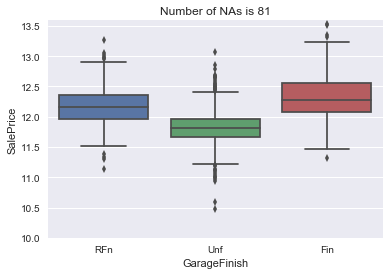

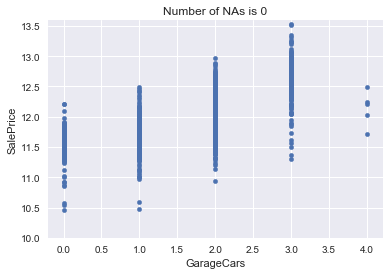

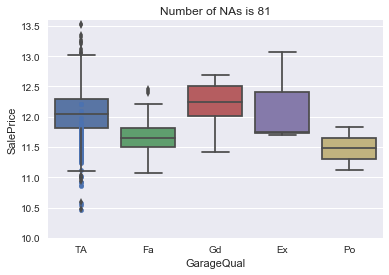

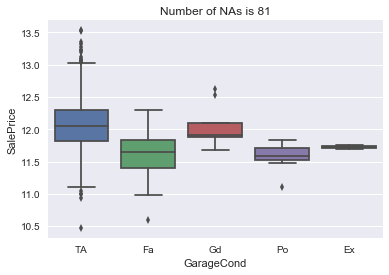

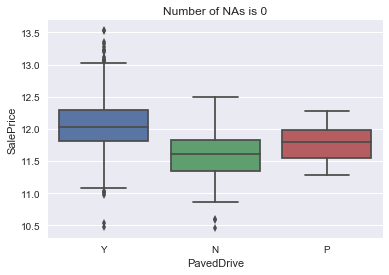

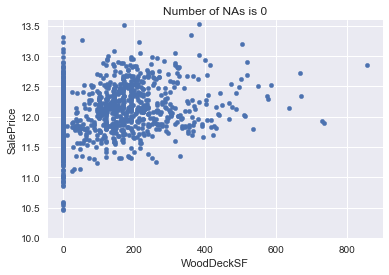

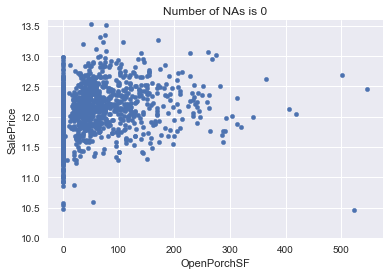

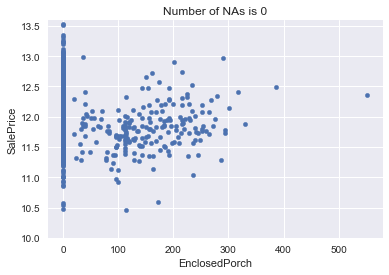

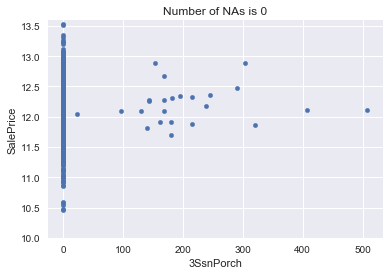

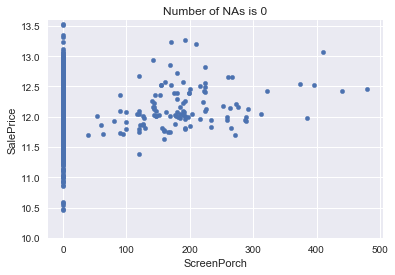

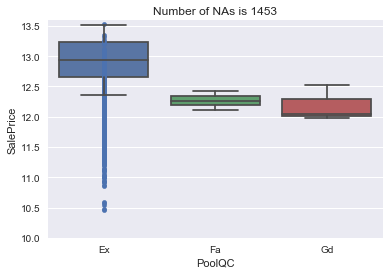

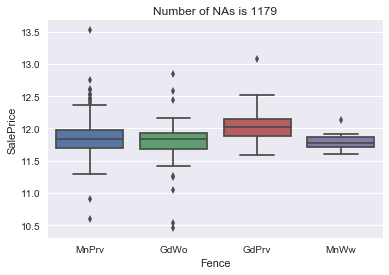

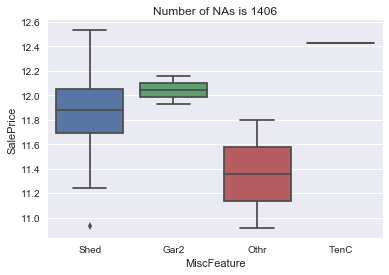

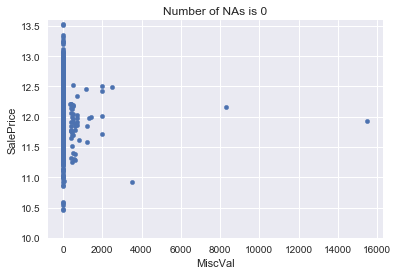

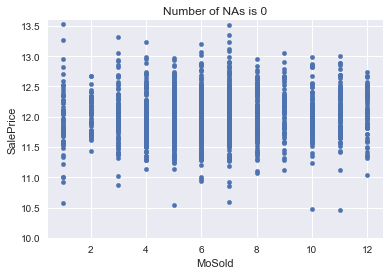

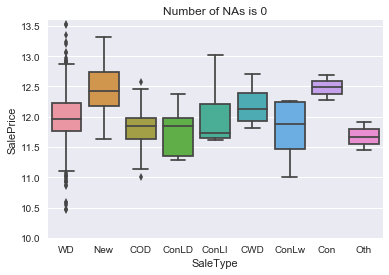

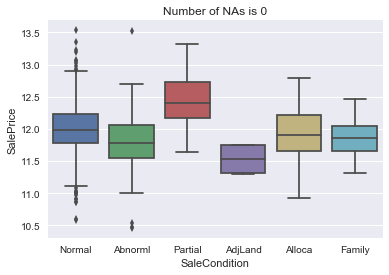

In [83]:
plot_saleprice_vars(df, range(80), 10, log(800000))

In [279]:
###HouseStyle
# plt.figure(1)
# plt.scatter(df.groupby('HouseStyle').SalePrice.mean().index,df.groupby('HouseStyle').SalePrice.mean().values)
# plt.xlabel('HouseStyle')
# plt.ylabel('mean SalePrice')
# plt.figure(2)
# plt.scatter(df.groupby('HouseStyle').count()['Id'].index, df.groupby('HouseStyle').count()['Id'].values)
# plt.xlabel('HouseStyle')
# plt.ylabel('count')
# plt.figure(3)
# plt.boxplot(df.HouseStyle, df.SalePrice)
# plt.xlabel('HouseStyle')
# plt.ylabel('Price')
# plt.show()

In [ ]:
#YearRemodAdd Analysis
#substract YearRemodAdd by 1950 since all the value is larger or equal 1950. and drop YearBuilt,
#since if no RemodAdd, it is same with the YearBuilt
plt.figure(1)
plt.scatter(df.groupby('YearRemodAdd').SalePrice.mean().index,df.groupby('YearRemodAdd').SalePrice.mean().values)
plt.xlabel('YearRemodAdd')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YearRemodAdd').count()['Id'].index, df.groupby('YearRemodAdd').count()['Id'].values)
plt.xlabel('YearRemodAdd')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YearRemodAdd, df.SalePrice)
plt.xlabel('year built')
plt.ylabel('Price')
plt.show()

In [82]:
#df.loc[df.YearRemodAdd == df.YearBuilt,:]#.groupby('YearBuilt').count()